<a href="https://colab.research.google.com/github/RahulSinghPundir/The-best-Classifier/blob/main/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# !wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [100]:
df["loan_status"].value_counts()
df["education"].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['loan']=label.fit_transform(df['loan_status'])
df['edu']=label.fit_transform(df['education'])
df['sex']=label.fit_transform(df['Gender'])
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan,edu,sex
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,1,1,1
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,1,0,0
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male,1,3,1
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female,1,3,0
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male,1,3,1


In [102]:
X=df[['Principal','terms','age','edu','sex']].values
X
Y=df[['loan']].values


In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)


In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4,train_size=0.8)
print(x_train.shape,y_test.shape)

(276, 5) (70, 1)


Train set Accuracy:  0.7608695652173914
Test set Accuracy:  0.7714285714285715


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

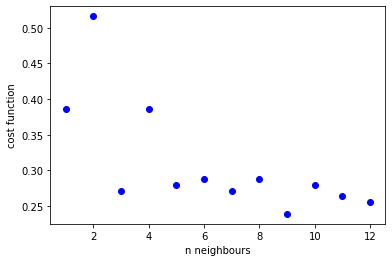

In [105]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
k=12
for i in range(1,k+1):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  plt.plot(i,np.mean(np.absolute(y_test-model.predict(x_test))),'bo-')
plt.xlabel('n neighbours')
plt.ylabel('cost function')
knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train,y_train)

y_hat=knn_model.predict(x_test)
print("Train set Accuracy: ", accuracy_score(y_train, knn_model.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

In [106]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model=DecisionTreeClassifier(criterion='entropy',max_depth=8)
dtree_model.fit(x_train,y_train)
y_hat=dtree_model.predict(x_test)
print("Train set Accuracy: ", accuracy_score(y_train, dtree_model.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7789855072463768
Test set Accuracy:  0.7714285714285715


In [107]:
# SVM
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_hat=svm_model.predict(x_test)
print("Train set Accuracy: ", accuracy_score(y_train, svm_model.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_hat=lr_model.predict(x_test)
print("Train set Accuracy: ", accuracy_score(y_train, lr_model.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Train set Accuracy:  0.7427536231884058
Test set Accuracy:  0.7857142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("-------------------------KNN Algorithm------------------------")
print("Jaccard_score: ",jaccard_score(y_test,knn_model.predict(x_test)))
print("F1 Score:      ",f1_score(y_test,knn_model.predict(x_test)))
print("Log Loss:      ",log_loss(y_test,knn_model.predict(x_test)))

print("-------------------------Desicion Tree Algorithm------------------------")
print("Jaccard_score: ",jaccard_score(y_test,dtree_model.predict(x_test)))
print("F1 Score:      ",f1_score(y_test,dtree_model.predict(x_test)))
print("Log Loss:      ",log_loss(y_test,dtree_model.predict(x_test)))

print("-------------------------SVM Algorithm------------------------")
print("Jaccard_score: ",jaccard_score(y_test,svm_model.predict(x_test)))
print("F1 Score:      ",f1_score(y_test,svm_model.predict(x_test)))
print("Log Loss:      ",log_loss(y_test,svm_model.predict(x_test)))

print("-------------------------Logistic Regression Algorithm------------------------")
print("Jaccard_score: ",jaccard_score(y_test,lr_model.predict(x_test)))
print("F1 Score:      ",f1_score(y_test,lr_model.predict(x_test)))
print("Log Loss:      ",log_loss(y_test,lr_model.predict(x_test)))


-------------------------KNN Algorithm------------------------
Jaccard_score:  0.7681159420289855
F1 Score:       0.8688524590163933
Log Loss:       7.894737381179913
-------------------------Desicion Tree Algorithm------------------------
Jaccard_score:  0.7681159420289855
F1 Score:       0.8688524590163933
Log Loss:       7.894737381179913
-------------------------SVM Algorithm------------------------
Jaccard_score:  0.7857142857142857
F1 Score:       0.88
Log Loss:       7.401337712644475
-------------------------Logistic Regression Algorithm------------------------
Jaccard_score:  0.7857142857142857
F1 Score:       0.88
Log Loss:       7.401337712644475
